In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1 - построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [2]:
years = (1900, 2001)
names_data = list()
for year in range(*years):
    df = pd.read_csv('usa_names/yob'+str(year)+'.txt', names=['Name', 'Sex', 'Count'])
    ruth = df[df.Name == 'Ruth'].Count.sum()
    robert = df[df.Name == 'Robert'].Count.sum()
    names_data.append([ruth, robert])

In [3]:
df = pd.DataFrame(names_data, columns=['Ruth', 'Robert'], index=[str(i) for i in range(*years)])
df.head()

,Ruth,Robert
1900,4781,3845
1901,3989,2559
1902,4401,3201
1903,4531,3057
1904,4915,3427


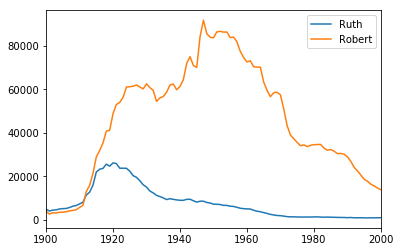

In [4]:
df.plot()

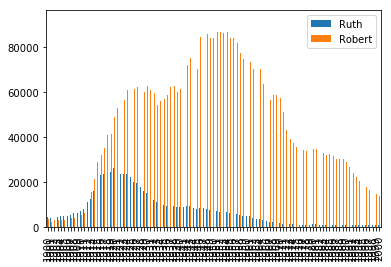

In [5]:
df.plot.bar()

### Задание 2 - Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212D16C2550>]], dtype=object)

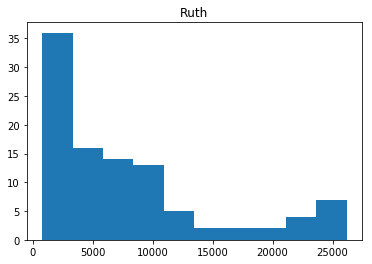

In [6]:
df.hist(column='Ruth', grid=False, bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212D21B7BA8>]], dtype=object)

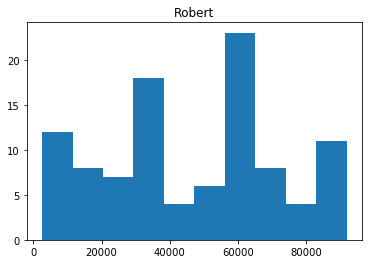

In [7]:
df.hist(column='Robert', grid=False, bins=10)

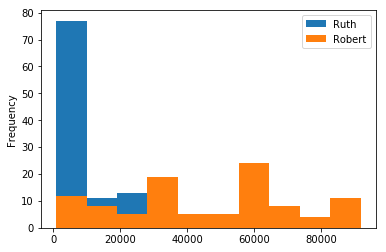

In [8]:
df.plot.hist()

### Задание 3 - Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [7]:
year = 1950
df = pd.read_csv('usa_names/yob'+str(year)+'.txt', names=['Name', 'Sex', 'Count'])

df_r = df[df.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', axis=0, ascending=False).head(10)

print(df_r)

         Count
Name          
Robert   83794
Richard  51125
Ronald   30001
Roger    12579
Raymond  11216
Rebecca   9442
Ruth      7136
Roy       6493
Rita      6440
Ralph     6424


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000165A96FB668>], dtype=object)

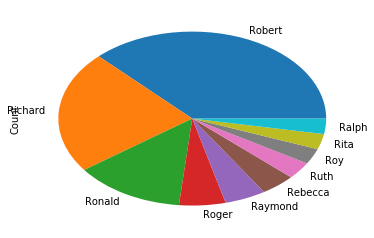

In [9]:
df_r.plot.pie(subplots=True, legend=False)

### Задание 4 - Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.

In [11]:
years = (1900, 2001)
df_list = list()
for year in range(*years):
    df = pd.read_csv('usa_names/yob'+str(year)+'.txt', names=['Name', 'Sex', 'Count'])
    df_list.append(df)

main_df = df_list[0]
for i, df in enumerate(df_list[1:]):
    main_df = pd.merge(main_df, df, on=['Name', 'Sex'], suffixes=('_{}'.format(1000+i), '_{}'.format(2000+i)))

count_list = [col for col in list(main_df) if 'Count' in col]

main_df['Total'] = main_df[count_list[0]]
for count in count_list[1:]:
    main_df['Total'] += main_df[count]

main_df = main_df[['Name', 'Total']].sort_values(by='Total', axis=0, ascending=False)


In [12]:
import re
vowels = '[aeiouy]' 

def count_vowels(name):
    v = re.findall(vowels, name, re.IGNORECASE)
    return len(v)

def count_consonants(name):
    return len(name) - count_vowels(name)

In [13]:
main_df['No'] = list(map(count_consonants, main_df.Name))
main_df.head()

,Name,Total,No
702,James,4788105,3
700,John,4719500,3
705,Robert,4619248,4
750,Michael,4002669,4
0,Mary,3839402,2


In [14]:
len_df = main_df.groupby('No').agg('sum').Total.to_frame()

In [15]:
print(len_df)

       Total
No          
1    4085809
2   35233396
3   63241933
4   61541547
5   25685403
6    3065839
8    1754983


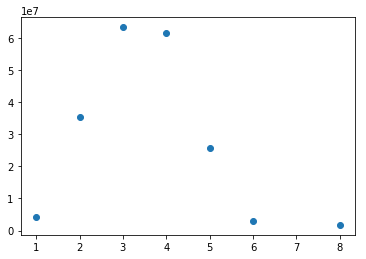

In [16]:
plt.scatter(list(len_df.index.values), list(len_df.Total) ) 